In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt

In [4]:
parks_df = gpd.read_file('Parks_data.json')

In [5]:
parks_df = parks_df.rename(columns = {'geometry':'park_geo'})

In [6]:
parks_df.set_geometry('park_geo', inplace=True)

In [7]:
to_convert = {"SUPERFICIE": 'float'}
parks_df = parks_df.astype(to_convert)

In [8]:
parks_df

,OBJECTID,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2,park_geo
0,3478,None,None,Université Concordia - Campus Loyola,1807-004,5.054930,Institutionnel,Autre,Privé,Autre espace vert,Espace sportif,"POLYGON ((-73.63623 45.45681, -73.63436 45.457..."
1,3479,Av.,du,Boisé,1641-513,0.032364,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Espace voirie,Îlot de voirie,"POLYGON ((-73.62224 45.51115, -73.62224 45.511..."
2,3480,Parc,None,Maurice-Cullen,0137-000,0.542681,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Parc d'arrondissement,Parc de quartier,"POLYGON ((-73.61999 45.48310, -73.61999 45.483..."
3,3481,None,None,Décarie / Zone Tampon #2,1641-637,0.033510,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Autre espace vert,Parc écran,"POLYGON ((-73.62738 45.48317, -73.62734 45.483..."
4,3482,None,None,Décarie / Zone Tampon #2,1641-637,0.014242,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Autre espace vert,Parc écran,"POLYGON ((-73.62324 45.48130, -73.62298 45.481..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2206,5684,,,Grand parc de l'Ouest,None,66.171719,Ville de Montréal,"Service des grands parcs, du Mont-Royal et des...",Agglomération,Grand parc,,"POLYGON ((-73.91558 45.44431, -73.91627 45.444..."
2207,5685,,,Grand parc de l'Ouest,None,254.156797,Ville de Montréal,"Service des grands parcs, du Mont-Royal et des...",Agglomération,Grand parc,,"POLYGON ((-73.92837 45.47382, -73.92843 45.473..."
2208,5686,,,Grand parc de l'Ouest,None,30.768241,Ville de Montréal,"Service des grands parcs, du Mont-Royal et des...",Agglomération,Grand parc,,"POLYGON ((-73.84103 45.51664, -73.84112 45.516..."
2209,5687,Futur parc,None,Maison Gomez,None,0.616153,Ville de Montréal,Pierrefonds-Roxboro,Arrondissement,Autre espace vert,Espace vacant,"POLYGON ((-73.89903 45.46236, -73.89955 45.463..."


In [9]:
parks_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
Mtl_poly = gpd.read_file('Mtl_DA_data.shp')

In [11]:
Mtl_poly.crs = "EPSG:4326"

In [12]:
Mtl_poly = Mtl_poly.to_crs("EPSG:4326")

In [13]:
Mtl_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
parks_df.crs == Mtl_poly.crs

True

In [15]:
to_convert = {'DAUID': 'int64'}
Mtl_poly = Mtl_poly.astype(to_convert)

Mtl_poly.rename(columns={"DAUID": "UID"}, inplace = True)

In [16]:
headers = ('UID','Population','Median after-tax income of one-person households','Median after-tax income of two-or-more-person households')

csep = ','

Census_data = pd.read_csv('MedianIncome_data.csv', sep = csep, names = headers)

In [17]:
Census_data = Census_data[1:]

Census_data

,UID,Population,Median after-tax income of one-person households,Median after-tax income of two-or-more-person households
1,2466,1942044.00,27860.00,62917.00
2,24660001,657.00,36544.00,77568.00
3,24660002,534.00,39552.00,85760.00
4,24660003,303.00,35456.00,66304.00
5,24660004,283.00,0.00,83712.00
...,...,...,...,...
3199,24663445,1469.00,48683.00,88064.00
3200,24663450,491.00,18624.00,54656.00
3201,24663451,428.00,27456.00,56704.00
3202,24663452,1602.00,43840.00,65152.00


In [18]:
#the following 4 blocks of code are ensuring that the data is in a usable type
to_convert = {'UID': 'int64'}
Census_data = Census_data.astype(to_convert)

In [19]:
to_convert = {"Median after-tax income of one-person households": 'float'}
Census_data = Census_data.astype(to_convert)

In [20]:
to_convert = {"Median after-tax income of two-or-more-person households": 'float'}
Census_data = Census_data.astype(to_convert)

In [21]:
to_convert = {"Population": 'float'}
Census_data = Census_data.astype(to_convert)

In [22]:
#making DA's with no data = 0 as this will be disregarded
Census_data = Census_data[1:]
Census_data = Census_data.fillna(0)
Census_data

,UID,Population,Median after-tax income of one-person households,Median after-tax income of two-or-more-person households
2,24660001,657.0,36544.0,77568.0
3,24660002,534.0,39552.0,85760.0
4,24660003,303.0,35456.0,66304.0
5,24660004,283.0,0.0,83712.0
6,24660005,235.0,0.0,0.0
...,...,...,...,...
3199,24663445,1469.0,48683.0,88064.0
3200,24663450,491.0,18624.0,54656.0
3201,24663451,428.0,27456.0,56704.0
3202,24663452,1602.0,43840.0,65152.0


In [23]:
#merged based on similar UIDs
Merged_census_poly = pd.merge(Mtl_poly,Census_data,on=['UID'])

In [24]:
Merged_census_poly

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry,Population,Median after-tax income of one-person households,Median after-tax income of two-or-more-person households
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.59641 45.45366, -73.59547 45.451...",301.0,29856.0,52608.0
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.59757 45.45038, -73.59841 45.450...",510.0,28480.0,57344.0
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60026 45.45297, -73.59944 45.453...",388.0,24832.0,49024.0
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60019 45.44991, -73.60113 45.449...",624.0,25216.0,59424.0
4,24661010,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60302 45.44942, -73.60397 45.449...",605.0,24576.0,64192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,24662574,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.66185 45.55963, -73.66204 45.559...",523.0,33408.0,70912.0
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.66003 45.56275, -73.66046 45.562...",524.0,20928.0,70400.0
3199,24662576,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.66105 45.56097, -73.66125 45.560...",521.0,25920.0,61824.0
3200,24662577,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.65694 45.56186, -73.65739 45.561...",614.0,25152.0,67328.0


In [25]:
#bellow is selecting all data that is bellow 27950 as this is the 'low income' threshold
one_person_lowInc = Merged_census_poly.loc[Merged_census_poly['Median after-tax income of one-person households'] < 27950]
#Bellow does the opposite to create 'above low income' data
one_person_notlowinc = Merged_census_poly.loc[Merged_census_poly['Median after-tax income of one-person households'] > 27950]

In [26]:
#this removes all the DA's with missing data
one_person_lowInc = one_person_lowInc.loc[one_person_lowInc['Median after-tax income of one-person households'] > 0]

In [27]:
#remiving unnecessary columns
del one_person_lowInc['Median after-tax income of two-or-more-person households']
del one_person_notlowinc['Median after-tax income of two-or-more-person households']

In [28]:
one_person_lowInc

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry,Population,Median after-tax income of one-person households
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60026 45.45297, -73.59944 45.453...",388.0,24832.0
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60019 45.44991, -73.60113 45.449...",624.0,25216.0
4,24661010,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60302 45.44942, -73.60397 45.449...",605.0,24576.0
5,24661011,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60243 45.45332, -73.60218 45.452...",451.0,26176.0
6,24661012,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60127 45.45317, -73.60114 45.452...",570.0,18432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,24662573,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.66224 45.55895, -73.66245 45.558...",459.0,24128.0
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.66003 45.56275, -73.66046 45.562...",524.0,20928.0
3199,24662576,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.66105 45.56097, -73.66125 45.560...",521.0,25920.0
3200,24662577,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((-73.65694 45.56186, -73.65739 45.561...",614.0,25152.0


In [29]:
one_person_notlowinc

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry,Population,Median after-tax income of one-person households
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.59641 45.45366, -73.59547 45.451...",301.0,29856.0
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.59757 45.45038, -73.59841 45.450...",510.0,28480.0
7,24661013,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60026 45.45297, -73.60114 45.452...",635.0,33024.0
11,24661017,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620089.00,0089.00,24660211,"POLYGON ((-73.59299 45.45572, -73.59282 45.455...",709.0,28352.0
12,24661018,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620089.00,0089.00,24660211,"POLYGON ((-73.58934 45.45385, -73.58937 45.453...",755.0,31968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,24662563,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620282.00,0282.00,24660113,"POLYGON ((-73.69068 45.54230, -73.68670 45.541...",1245.0,28000.0
3187,24662564,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620283.02,0283.02,24660126,"POLYGON ((-73.68892 45.53786, -73.69068 45.536...",483.0,29888.0
3190,24662567,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620285.00,0285.00,24660135,"POLYGON ((-73.70122 45.53254, -73.70189 45.532...",386.0,30784.0
3192,24662569,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620286.00,0286.00,24660138,"POLYGON ((-73.70079 45.52850, -73.70147 45.527...",451.0,39296.0


In [30]:
#spatially joinning the low and not low income status data frames with the parks data frame to establish which DA's intersect with parks
oneperson_sjoin_lowinc = one_person_lowInc.sjoin(parks_df, how ='left')
oneperson_sjoin_notlowinc = one_person_notlowinc.sjoin(parks_df, how ='left')

In [31]:
oneperson_sjoin_lowinc

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24661010,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,24661011,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Paul-Émile-Côté,1641-341,0.032743,Ville de Montréal,Le Sud-Ouest,Arrondissement,Espace voirie,Îlot de voirie
6,24661012,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Olympia / Gouin,0020-000,0.255349,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Louis-Hébert,0021-000,1.293932,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier
3199,24662576,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3200,24662577,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
oneperson_sjoin_notlowinc

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,24661013,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,24661017,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Garneau,0346-000,0.381763,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Îlot de verdure
12,24661018,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Édouard-Fabre,0356-000,0.091408,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Îlot de verdure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,24662567,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Place,None,Jean-Massé,1641-436,0.013647,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Espace voirie,Îlot de voirie
3190,24662567,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Jean-Massé,1641-437,0.009741,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Espace voirie,Îlot de voirie
3190,24662567,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Jean-Massé / Autoroute Des Laurentides,0436-000,0.553617,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Espace voirie,Îlot de voirie
3192,24662569,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#removing DA's which do not intersect with a Park using the 'SUPERFICIE' column, as this column has no missing values from the original parks data
oneperson_LowInc_parks = oneperson_sjoin_lowinc.dropna(subset = ['SUPERFICIE'])
oneperson_notlowinc_parks = oneperson_sjoin_notlowinc.dropna(subset = ['SUPERFICIE'])

In [34]:
oneperson_LowInc_parks

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
5,24661011,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Paul-Émile-Côté,1641-341,0.032743,Ville de Montréal,Le Sud-Ouest,Arrondissement,Espace voirie,Îlot de voirie
9,24661015,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Saint-John-Bosco,0274-000,0.187648,Commission scolaire,Commission scolaire,Gouvernement du Québec,Parc d'arrondissement,Parc école
14,24661020,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Laurendeau / Émard,1641-352,0.020259,Ville de Montréal,Le Sud-Ouest,Arrondissement,Espace voirie,Îlot de voirie
18,24661024,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,,De La Vérendrye,0351-000,3.374794,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Parc de quartier
27,24661033,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Passage,None,Albert-Millaire,0839-000,0.084796,Ville de Montréal,Le Sud-Ouest,Arrondissement,Espace voirie,Passage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,None,None,1.718593,None,None,None,None,None
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Gouin ( Sophie-Barat ),0034-000,3.973382,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,None,None,0.167494,None,None,None,None,None
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Olympia / Gouin,0020-000,0.255349,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier


In [35]:
oneperson_notlowinc_parks

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
11,24661017,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Garneau,0346-000,0.381763,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Îlot de verdure
12,24661018,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Édouard-Fabre,0356-000,0.091408,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Îlot de verdure
17,24661023,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,,De La Vérendrye,0351-000,0.379327,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Parc de quartier
17,24661023,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,,De La Vérendrye,0351-000,0.078668,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Parc de quartier
19,24661025,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Saint-Paul,0350-000,0.860496,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Îlot de verdure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,24662790,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Saint-Laurent,2562-000,3.940343,Ville de Montréal,Montréal-Nord,Arrondissement,Parc d'arrondissement,Parc de quartier
3186,24662563,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Marcelin-Wilson,0010-000,3.111536,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier
3190,24662567,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Place,None,Jean-Massé,1641-436,0.013647,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Espace voirie,Îlot de voirie
3190,24662567,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Jean-Massé,1641-437,0.009741,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Espace voirie,Îlot de voirie


In [36]:
#creating the low income DA's which do not interesect with green space 
LowInc_noParks = oneperson_sjoin_lowinc.fillna(0)

In [37]:
LowInc_noParks = gpd.GeoDataFrame(LowInc_noParks)

In [38]:
#by filling the NaN values with 0, and knowing that the SUPERFICIE column from the Parks_df data was complete, allows for the isolation of the DA's that donnot intersect with parks 
LowInc_noParks = LowInc_noParks.loc[LowInc_noParks['SUPERFICIE'] == 0]

In [39]:
LowInc_noParks

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
4,24661010,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
6,24661012,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
8,24661014,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,24662572,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3196,24662573,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3199,24662576,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3200,24662577,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0


Text(0.5, 1.0, "Montreal DA's, 1-Person Households Below Poverty Line (After Tax) \nas it Relates to Green Space")

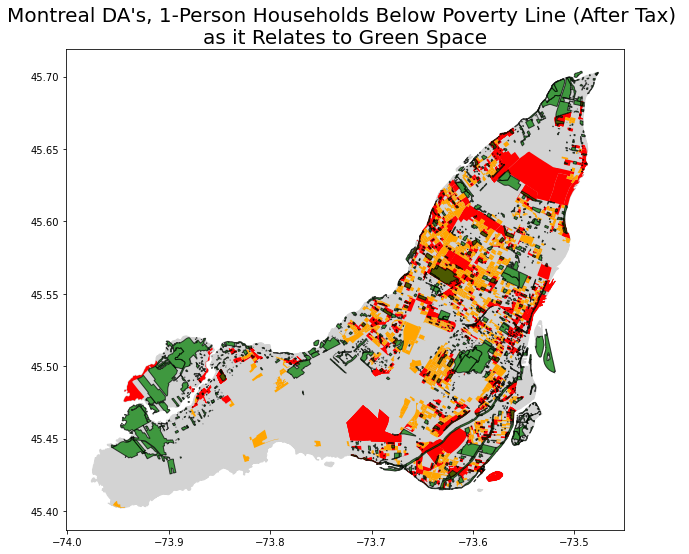

In [40]:
#plotting map
onepersonLowInc_map = fig, ax = plt.subplots(figsize = (10,10))
Merged_census_poly.plot(ax = ax, color = 'lightgrey', edgecolor = 'lightgrey')
oneperson_LowInc_parks.plot(ax = ax, color = 'red')
LowInc_noParks.plot(ax = ax, color = 'orange', legend = True)
parks_df.plot(ax = ax, color = 'green', alpha = .7, edgecolor = 'black')
plt.title("Montreal DA's, 1-Person Households Below Poverty Line (After Tax) \nas it Relates to Green Space", fontsize = 20)

In [41]:
fig.savefig("onepersonLowInc_map.png", dpi=300)

Text(0.5, 1.0, "Montreal DA's, 1-Person Households Above Poverty Line (After Tax) \nas it Relates to Green Space")

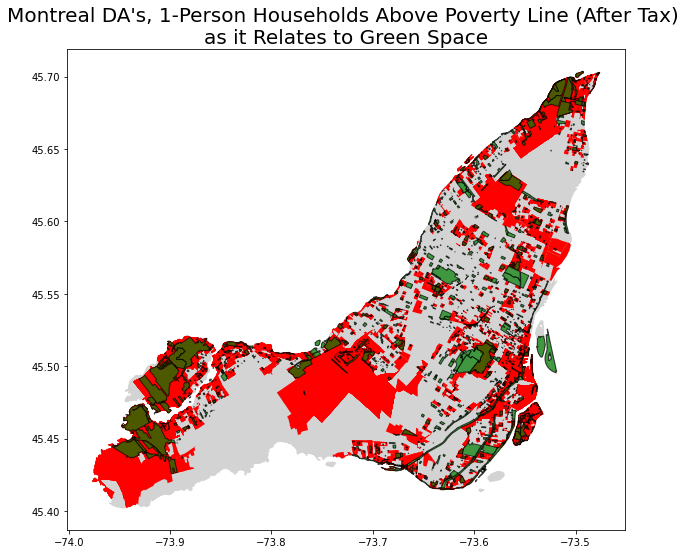

In [42]:
oneperson_notLowInc_map = fig, ax = plt.subplots(figsize = (10,10))
Merged_census_poly.plot(ax = ax, color = 'lightgrey', edgecolor = 'lightgrey')
oneperson_notlowinc_parks.plot(ax = ax, color = 'red')
parks_df.plot(ax = ax, color = 'green', alpha = .7, edgecolor = 'black')
plt.title("Montreal DA's, 1-Person Households Above Poverty Line (After Tax) \nas it Relates to Green Space", fontsize = 20)

In [43]:
#fig.savefig("oneperson_notLowInc_map.png", dpi=300)


# After this point the cod eis repeated to create the 2 person house hold data and maps

In [44]:
two_person_lowInc = Merged_census_poly.loc[Merged_census_poly['Median after-tax income of two-or-more-person households'] < 61000]
two_person_notlowinc = Merged_census_poly.loc[Merged_census_poly['Median after-tax income of two-or-more-person households'] > 61000]

In [45]:
two_person_lowInc = two_person_lowInc.loc[two_person_lowInc['Median after-tax income of two-or-more-person households'] > 0]

In [46]:
del two_person_lowInc['Median after-tax income of one-person households']
del two_person_notlowinc['Median after-tax income of one-person households']

In [47]:
two_person_lowInc

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry,Population,Median after-tax income of two-or-more-person households
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.59641 45.45366, -73.59547 45.451...",301.0,52608.0
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.59757 45.45038, -73.59841 45.450...",510.0,57344.0
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60026 45.45297, -73.59944 45.453...",388.0,49024.0
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60019 45.44991, -73.60113 45.449...",624.0,59424.0
7,24661013,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((-73.60026 45.45297, -73.60114 45.452...",635.0,56064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183,24662560,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620284.00,0284.00,24660126,"POLYGON ((-73.69672 45.53984, -73.69778 45.539...",690.0,51200.0
3184,24662561,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620284.00,0284.00,24660126,"POLYGON ((-73.69974 45.53763, -73.69996 45.537...",508.0,57472.0
3186,24662563,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620282.00,0282.00,24660113,"POLYGON ((-73.69068 45.54230, -73.68670 45.541...",1245.0,52480.0
3188,24662565,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,24462,Montréal,B,4620282.00,0282.00,24660113,"POLYGON ((-73.68639 45.54312, -73.68685 45.542...",412.0,58560.0


In [48]:
two_person_sjoin_lowinc = two_person_lowInc.sjoin(parks_df, how ='left')
two_person_sjoin_notlowinc = two_person_notlowinc.sjoin(parks_df, how = 'left')

In [49]:
two_person_sjoin_lowinc

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,24661013,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183,24662560,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Frigon / De Salaberry,1641-102,0.114047,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Espace voirie,Îlot de voirie
3184,24662561,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3186,24662563,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Marcelin-Wilson,0010-000,3.111536,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier
3188,24662565,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Zotique-Racicot,0030-000,3.006540,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier


In [50]:
twopersonLowInc_parks = two_person_sjoin_lowinc.dropna(subset = ['SUPERFICIE'])
twoperson_notLowInc_parks = two_person_sjoin_notlowinc.dropna(subset = ['SUPERFICIE'])

In [51]:
twopersonLowInc_parks

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
9,24661015,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Saint-John-Bosco,0274-000,0.187648,Commission scolaire,Commission scolaire,Gouvernement du Québec,Parc d'arrondissement,Parc école
11,24661017,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Garneau,0346-000,0.381763,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Îlot de verdure
12,24661018,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Édouard-Fabre,0356-000,0.091408,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Îlot de verdure
14,24661020,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Laurendeau / Émard,1641-352,0.020259,Ville de Montréal,Le Sud-Ouest,Arrondissement,Espace voirie,Îlot de voirie
17,24661023,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,,De La Vérendrye,0351-000,0.379327,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Parc de quartier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,24662925,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Versailles,0695-000,0.335690,Ville de Montréal,Rivière-des-Prairies-Pointe-aux-Trembles,Arrondissement,Parc d'arrondissement,Parc de quartier
3182,24662559,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,de,Salaberry,0009-000,2.057870,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier
3183,24662560,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Frigon / De Salaberry,1641-102,0.114047,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Espace voirie,Îlot de voirie
3186,24662563,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Marcelin-Wilson,0010-000,3.111536,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier


In [52]:
twopersonLowInc_noParks = two_person_sjoin_lowinc.fillna(0)

In [53]:
twopersonLowInc_noParks = gpd.GeoDataFrame(twopersonLowInc_noParks)

In [54]:
twopersonLowInc_noParks = twopersonLowInc_noParks.loc[twopersonLowInc_noParks['SUPERFICIE'] == 0]

In [55]:
twopersonLowInc_noParks

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
7,24661013,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,24662556,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3180,24662557,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3181,24662558,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0
3184,24662561,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0,0,0,0,0.0,0,0,0,0,0


Text(0.5, 1.0, "Montreal DA's, 2-Person Households Below Poverty Line (After Tax) \nas it Relates to Green Space")

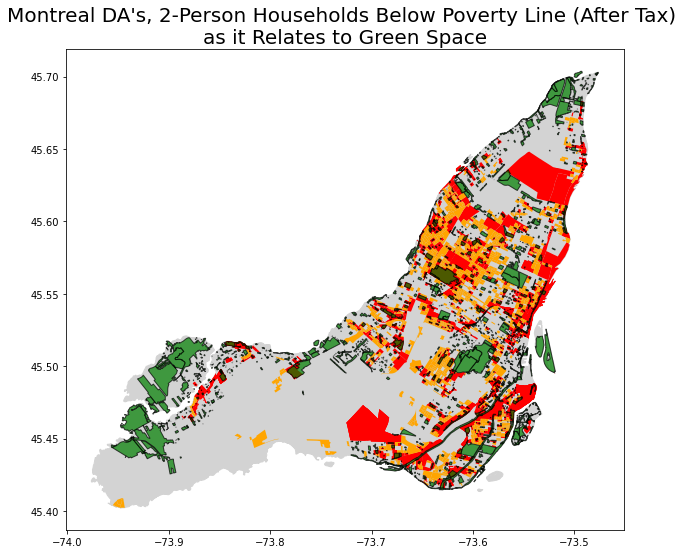

In [56]:
twopersonLowInc_map = fig, ax = plt.subplots(figsize = (10,10))
Merged_census_poly.plot(ax = ax, color = 'lightgrey', edgecolor = 'lightgrey')
twopersonLowInc_parks.plot(ax = ax, color = 'red')
twopersonLowInc_noParks.plot(ax = ax, color = 'orange')
parks_df.plot(ax = ax, color = 'green', alpha = .7, edgecolor = 'black')
plt.title("Montreal DA's, 2-Person Households Below Poverty Line (After Tax) \nas it Relates to Green Space", fontsize = 20)

In [57]:
fig.savefig("twopersonLowInc_map.png", dpi=300)

Text(0.5, 1.0, "Montreal DA's, 2-Person Households Above Poverty Line (After Tax) \nas it Relates to Green Space")

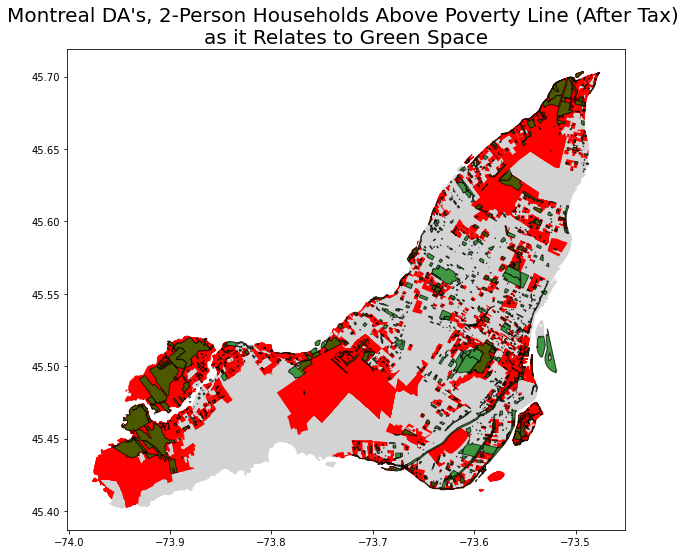

In [58]:
twoperson_notLowInc_map = fig, ax = plt.subplots(figsize = (10,10))
Merged_census_poly.plot(ax = ax, color = 'lightgrey', edgecolor = 'lightgrey')
twoperson_notLowInc_parks.plot(ax = ax, color = 'red')
parks_df.plot(ax = ax, color = 'green', alpha = .7, edgecolor = 'black')
plt.title("Montreal DA's, 2-Person Households Above Poverty Line (After Tax) \nas it Relates to Green Space", fontsize = 20)

In [59]:
#fig.savefig("twoperson_notLowInc_map.png", dpi=300)

In [60]:
twoperson_notLowInc_parks

,UID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,Type,Lien,Nom,NUM_INDEX,SUPERFICIE,PROPRIETE,GESTION,COMPETENCE,TYPO1,TYPO2
5,24661011,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Paul-Émile-Côté,1641-341,0.032743,Ville de Montréal,Le Sud-Ouest,Arrondissement,Espace voirie,Îlot de voirie
18,24661024,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,,De La Vérendrye,0351-000,3.374794,Ville de Montréal,Le Sud-Ouest,Arrondissement,Parc d'arrondissement,Parc de quartier
32,24660628,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Macdonald,0172-000,3.235515,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Parc d'arrondissement,Parc de quartier
37,24660633,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,Côte-Saint-Luc / Hampton,0641-000,0.021085,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Parc d'arrondissement,Îlot de verdure
38,24660634,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Warren-Allmand,0161-000,1.756330,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Parc d'arrondissement,Parc de quartier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,None,None,1.718593,None,None,None,None,None
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Gouin ( Sophie-Barat ),0034-000,3.973382,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,None,None,None,None,0.167494,None,None,None,None,None
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,Parc,None,Olympia / Gouin,0020-000,0.255349,Ville de Montréal,Ahuntsic-Cartierville,Arrondissement,Parc d'arrondissement,Parc de quartier


In [61]:
def whatisArea(data):
    AreaC = input('Area column name is: ')
    #the below code is removing duplicates that are prodeced when 2 or more DA's are spatially joined to the same green area, 
    #in order to have an accurate representation of the total area these duplicates must be removed
    datafix = data.drop_duplicates(subset= AreaC, keep='first', inplace=False)
    dataArea = datafix[AreaC].sum()
    return dataArea
#data to use:parks_df, oneperson_LowInc_parks, twopersonLowInc_parks, twoperson_notLowInc_parks, oneperson_notlowinc_parks
#Column name:SUPERFICIE for all
#Area in Ha

In [62]:
whatisArea(parks_df)

Area column name is:  SUPERFICIE


6651.118188653819

In [63]:
whatisArea(oneperson_LowInc_parks)

Area column name is:  SUPERFICIE


1679.045678834382

In [64]:
whatisArea(twopersonLowInc_parks)

Area column name is:  SUPERFICIE


1804.2519788773081

In [65]:
whatisArea(twoperson_notLowInc_parks)

Area column name is:  SUPERFICIE


4795.608815483182

In [66]:
whatisArea(oneperson_notlowinc_parks)

Area column name is:  SUPERFICIE


4965.634059472684